In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
%matplotlib inline
sns.set_context("notebook")
sns.set(style="whitegrid")

# 2014 expenditure the US spent on foreign aid. 
# Found here: https://explorer.usaid.gov/query
aid = pd.read_csv("data/us_aid.csv")
aid = aid[aid.constant_amount > 0]
aid = aid[aid.current_amount > 0]

for attribute in aid:
    print attribute

id
country_id
country_code
country_name
region_id
region_name
income_group_id
income_group_name
income_group_acronym
implementing_agency_id
implementing_agency_acronym
implementing_agency_name
implementing_subagency_id
subagency_acronym
subagency_name
channel_category_id
channel_category_name
channel_subcategory_name
channel_subcategory_id
channel_id
channel_name
dac_category_id
dac_category_name
dac_sector_code
dac_sector_name
dac_purpose_code
dac_purpose_name
funding_account_id
funding_account_name
assistance_category_id
assistance_category_name
activity_id
activity_name
activity_project_number
activity_start_date
activity_end_date
transaction_type_id
transaction_type_name
fiscal_year
current_amount
constant_amount
funding_agency_id
funding_agency_name
funding_agency_acronym
aid_type_group_id
aid_type_group_name


In [2]:
# Let's look at the development assistance committee categories
categories = aid['dac_category_name'].unique()

In [3]:
def total_costs(dataframe, region_label, cost_label):
    costs = {}
    for index,row in dataframe.iterrows():
        region = row[region_label]
        cost = row[cost_label]
        if cost >= 0:
            if region in costs:
                costs[region] += cost
            else:
                costs[region] = cost
    return costs

def costs_of(df, category, region_label, cost_label):
    aid_category = df[df.dac_category_name == category]
    return total_costs(aid_category, region_label, cost_label)

def dict_to_df(dictionary, cols):
    return pd.DataFrame(dictionary.items(), columns=cols)

totals = total_costs(aid, 'dac_category_name', 'constant_amount')
totals_df = dict_to_df(totals, ['Category', 'Cost'])
totals_df

,Category,Cost
0,Economic Growth,788511745
1,Commodity Assistance,342401778
2,Infrastructure,755349628
3,Health and Population,9860578047
4,Humanitarian,6194629955
5,Governance,3239981797
6,Other,5975251790
7,Education,1115743037
8,Agriculture,1256992748


In [4]:
totals_df.to_csv('data/totals.csv', index=False)

In [5]:
long_aid = pd.read_excel('data/2003_2012_foreign_aid.xlsx')


In [6]:
years = range(2003,2013)

year_totals = {}
for year in years:
    year_totals[year] = total_costs(long_aid[long_aid.fiscal_year == year], 'dac_category_name', 'constant_amount')


In [7]:
year_totals_df = pd.DataFrame.from_dict(year_totals)

year_totals_dfs = {}
for year in year_totals:
    year_totals_dfs[year] = dict_to_df(year_totals[year], ['Expenditure', 'Cost'])
    
year_totals_df = pd.concat(year_totals_dfs)
year_totals_df['Year'] = year_totals_df.index.get_level_values(0)
year_totals_df.to_csv('data/year_totals.csv', index=False)

In [8]:
country_costs = {}
for category in categories:
    country_costs[category] = costs_of(aid, category, 'country_name', 'constant_amount')
    
country_costs_df = pd.DataFrame.from_dict(country_costs)
country_costs_df.index.name = 'Country'
country_costs_df = country_costs_df.reset_index(level=0)

regions = {}
for index,row in aid.iterrows():
    region = row['region_name']
    country = row['country_name']
    regions[country] = region

country_costs_df['Region'] = country_costs_df['Country']
country_costs_df['Region'] = country_costs_df['Region'].replace(regions)
country_costs_df 


,Country,Agriculture,Commodity Assistance,Economic Growth,Education,Governance,Health and Population,Humanitarian,Infrastructure,Other,Region
0,Afghanistan,94599568,NaN,104734655,158674484,524438584,113081091,182282027,284242624,168147907,South and Central Asia
1,Albania,NaN,NaN,2677744,487442,11305099,460688,NaN,NaN,4638485,Europe and Eurasia
2,Algeria,NaN,NaN,NaN,NaN,93393,NaN,9266192,492625,NaN,Middle East and North Africa
3,Angola,NaN,NaN,714002,24631,1506298,34837724,5399578,NaN,5620055,Sub-Saharan Africa
4,Argentina,338659,NaN,317964,NaN,NaN,NaN,NaN,NaN,226095,Western Hemisphere
5,Armenia,NaN,147690,8047686,1476705,13567330,5499545,221577,NaN,4751180,Europe and Eurasia
6,Asia Region,758208,NaN,3029778,1310401,2233127,29637858,461826,NaN,113417704,World
7,Azerbaijan,NaN,NaN,3885086,1411655,5566036,NaN,NaN,NaN,3873570,Europe and Eurasia
8,Bahrain,NaN,NaN,NaN,NaN,849316,NaN,NaN,NaN,NaN,Middle East and North Africa
9,Bangladesh,31475585,27243662,1010182,4301134,12668073,101870398,5599341,2101,34606563,South and Central Asia


In [9]:
span_country_costs = {}
for category in categories:
    span_country_costs[category] = costs_of(long_aid, category, 'country_name', 'constant_amount')
    
span_country_costs_df = pd.DataFrame.from_dict(span_country_costs)
span_country_costs_df.index.name = 'Country'
span_country_costs_df = span_country_costs_df.reset_index(level=0)

span_regions = {}
for index,row in long_aid.iterrows():
    span_region = row['region_name']
    span_country = row['country_name']
    span_regions[span_country] = span_region

span_country_costs_df['Region'] = span_country_costs_df['Country']
span_country_costs_df['Region'] = span_country_costs_df['Region'].replace(regions)




In [10]:
def to_int(x):
    if np.isnan(x):
        return np.nan
    else:
        return int(x)
span_country_costs_df[categories] = span_country_costs_df[categories].applymap(to_int)
span_country_costs_df

,Country,Agriculture,Commodity Assistance,Economic Growth,Education,Governance,Health and Population,Humanitarian,Infrastructure,Other,Region
0,Afghanistan,3543467358,668943866,4256207743,2091130996,1.064999e+11,2218817682,2810030791,9501617342,2713473045,South and Central Asia
1,Albania,16127099,25042322,136253117,3613538,4.185826e+08,81012555,1834370,24927784,256737338,Europe and Eurasia
2,Algeria,NaN,6217212,3939975,NaN,4.414825e+07,472992,100123052,4781382,677981,Middle East and North Africa
3,Angola,19040244,87966111,18777431,5594164,3.479541e+08,618159971,646647525,3087406,83021933,Sub-Saharan Africa
4,Anguilla,NaN,NaN,NaN,NaN,1.620000e+02,NaN,NaN,NaN,NaN,Anguilla
5,Antigua and Barbuda,NaN,NaN,13892,NaN,1.614993e+07,NaN,1,NaN,454709,Antigua and Barbuda
6,Argentina,3228003,NaN,7380634,763689,8.552674e+07,1217411,558812,18913784,5305073,Western Hemisphere
7,Armenia,396431950,33900617,84812867,15191240,8.421877e+08,160247587,27529030,173741056,495580984,Europe and Eurasia
8,Aruba,NaN,NaN,50863,NaN,2.319520e+05,NaN,NaN,NaN,NaN,Aruba
9,Asia Region,7878996,NaN,68187154,14392365,1.214837e+08,310612754,81101310,12710248,2913754724,World


In [11]:
span_country_costs_df.columns = ['2003-2012 ' + col for col in span_country_costs_df.columns]

In [12]:
span_country_costs_df = span_country_costs_df.drop('2003-2012 Region', 1)
span_country_costs_df = span_country_costs_df.rename( columns={'2003-2012 Country': 'Country'})


In [13]:
span_country_costs_df

,Country,2003-2012 Agriculture,2003-2012 Commodity Assistance,2003-2012 Economic Growth,2003-2012 Education,2003-2012 Governance,2003-2012 Health and Population,2003-2012 Humanitarian,2003-2012 Infrastructure,2003-2012 Other
0,Afghanistan,3543467358,668943866,4256207743,2091130996,1.064999e+11,2218817682,2810030791,9501617342,2713473045
1,Albania,16127099,25042322,136253117,3613538,4.185826e+08,81012555,1834370,24927784,256737338
2,Algeria,NaN,6217212,3939975,NaN,4.414825e+07,472992,100123052,4781382,677981
3,Angola,19040244,87966111,18777431,5594164,3.479541e+08,618159971,646647525,3087406,83021933
4,Anguilla,NaN,NaN,NaN,NaN,1.620000e+02,NaN,NaN,NaN,NaN
5,Antigua and Barbuda,NaN,NaN,13892,NaN,1.614993e+07,NaN,1,NaN,454709
6,Argentina,3228003,NaN,7380634,763689,8.552674e+07,1217411,558812,18913784,5305073
7,Armenia,396431950,33900617,84812867,15191240,8.421877e+08,160247587,27529030,173741056,495580984
8,Aruba,NaN,NaN,50863,NaN,2.319520e+05,NaN,NaN,NaN,NaN
9,Asia Region,7878996,NaN,68187154,14392365,1.214837e+08,310612754,81101310,12710248,2913754724


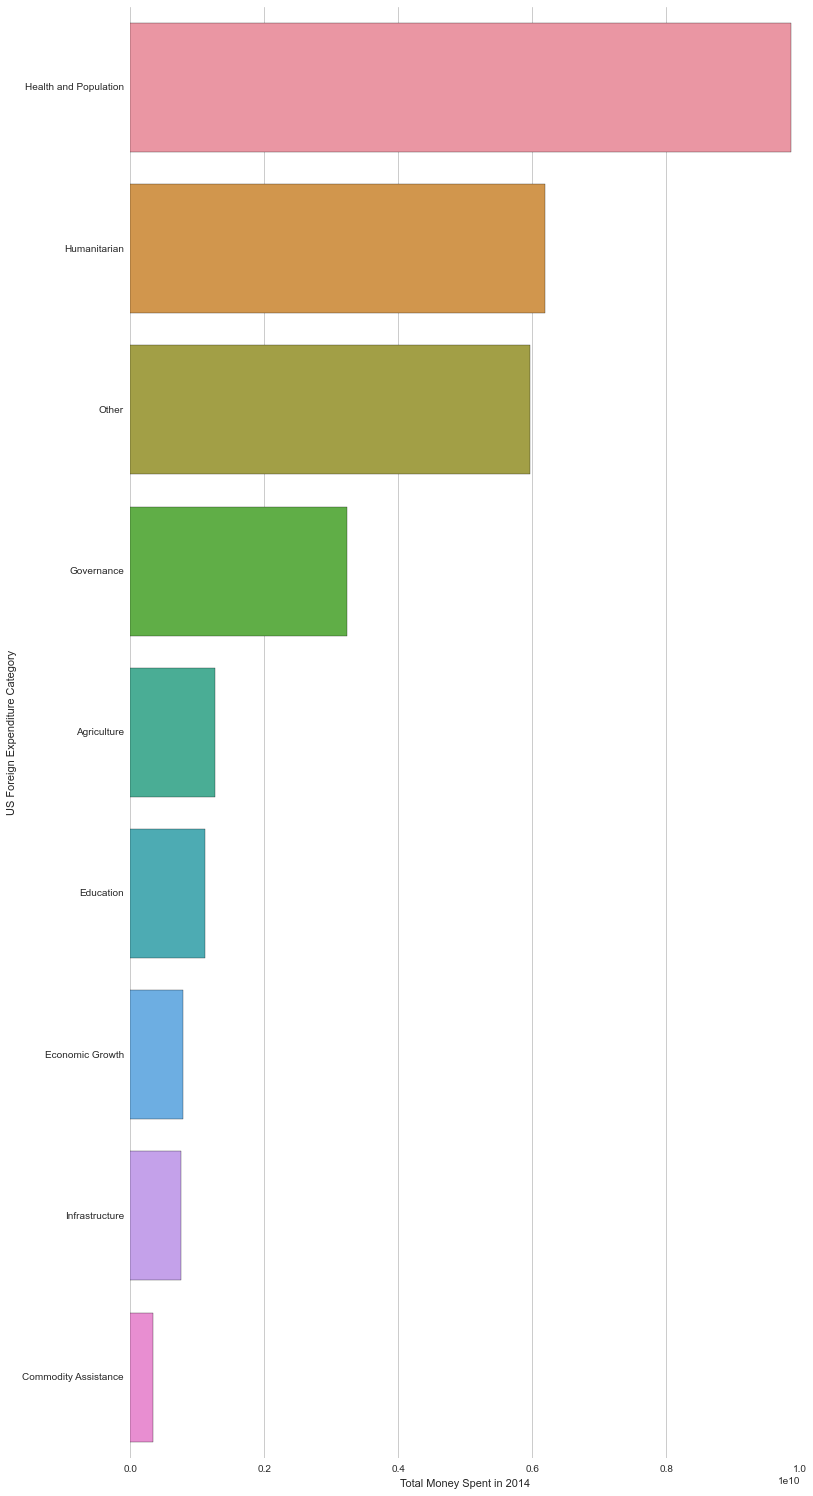

In [14]:
def plot_costs(costs, x, y, xlabel, ylabel):
    plt.figure(figsize=(12, 26))
    cost_plot = sns.barplot(data=costs.sort(x, ascending=False), x=x, y=y)
    cost_plot.set(xlabel=xlabel, ylabel=ylabel)
    sns.despine(left=True, bottom=True)


plot_costs(totals_df, 'Cost', 'Category', 'Total Money Spent in 2014', 'US Foreign Expenditure Category')

In [15]:
hdr = pd.read_excel('data/HDR.xlsx')
hdr

,Country,2000 Life Expectancy,2013 Life Expectancy,2000-2013 Life Expectancy Increase,2000 Education Index,2013 Education Index,2000-2013 Education Index Increase,2000 Mean Years of Schooling,2013 Mean Years of Schooling,2000-2013 Mean Years of Schooling Increase,2000 Income Index,2013 Income Index,2000-2013 Income Index Increase,2000 GNI per Capita,2013 GNI per Capita,2000-2013 GNI per Capita Increase,2000 HDI,2013 HDI,2000-2013 HDI Increase
0,Afghanistan,54.9,60.9,6.0,0.225522,0.365333,0.139811,2.1,3.2,1.1,0.328,0.445,0.117,877,1904,1027,0.341,0.468,0.127
1,Albania,74.2,77.4,3.2,0.565465,0.608519,0.043054,8.5,9.3,0.8,0.596,0.683,0.087,5185,9225,4040,0.655,0.716,0.061
2,Algeria,69.0,71.0,2.0,0.493489,0.642589,0.149100,5.9,7.6,1.7,0.686,0.730,0.044,9378,12555,3177,0.634,0.717,0.083
3,Andorra,78.9,81.2,2.3,NaN,0.670287,NaN,NaN,10.4,NaN,0.867,0.907,0.040,31171,40597,9426,NaN,0.830,NaN
4,Angola,45.2,51.9,6.7,0.298712,0.474212,0.175500,4.4,4.7,0.3,0.461,0.626,0.165,2117,6323,4206,0.377,0.526,0.149
5,Antigua and Barbuda,73.5,76.0,2.5,NaN,0.681141,NaN,NaN,8.9,NaN,0.750,0.791,0.041,14289,18800,4511,NaN,0.774,NaN
6,Argentina,73.8,76.3,2.5,0.710665,0.783356,0.072690,9.1,9.8,0.7,0.724,0.778,0.054,12088,17297,5209,0.753,0.808,0.055
7,Armenia,71.5,74.6,3.1,0.668267,0.701367,0.033100,10.8,10.8,0.0,0.514,0.661,0.147,3004,7952,4948,0.648,0.730,0.082
8,Australia,79.6,82.5,2.9,0.895400,0.926536,0.031136,11.9,12.8,0.9,0.881,0.911,0.030,34148,41524,7376,0.898,0.933,0.035
9,Austria,78.1,81.1,3.0,0.729521,0.794481,0.064960,9.1,10.8,1.7,0.894,0.916,0.022,37079,42930,5851,0.835,0.881,0.046


In [48]:
populations = pd.read_csv('data/populations.csv')
populations = populations.rename(columns={'Country Name': 'Country', '2014': '2014 Population'})
populations = populations[['Country', '2014 Population']]
foreign_aid = pd.merge(hdr,country_costs_df, on='Country', how='outer')
foreign_aid = pd.merge(foreign_aid,span_country_costs_df, on='Country', how='outer')
foreign_aid = foreign_aid.rename(columns={'Region_y': 'Region'})

for category in categories:
    foreign_aid[category] = foreign_aid[category].fillna(0)
    
for category in ['2003-2012 ' + cat for cat in categories]:
    foreign_aid[category] = foreign_aid[category].fillna(0)


foreign_aid = pd.merge(foreign_aid, populations, on='Country', how='outer')
foreign_aid = foreign_aid.dropna(subset=['2013 Life Expectancy'])


foreign_aid.ix[foreign_aid.Country==u"C\xf4te d'Ivoire", 'Country'] = "Ivory Coast"


In [49]:
for country in foreign_aid[pd.isnull(foreign_aid['2014 Population'])]['Country'].unique():
    print country

Bahamas
Bolivia (Plurinational State of)
Cape Verde
Congo
Congo (Democratic Republic of the)
Ivory Coast
Egypt
Gambia
Hong Kong, China (SAR)
Iran (Islamic Republic of)
Korea (Republic of)
Kyrgyzstan
Lao People's Democratic Republic
Micronesia (Federated States of)
Moldova (Republic of)
Palestine, State of
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Slovakia
Tanzania (United Republic of)
The former Yugoslav Republic of Macedonia
Venezuela (Bolivarian Republic of)
Viet Nam
Yemen


In [50]:
foreign_aid[pd.isnull(foreign_aid['2014 Population'])]['Country'].unique()


array([u'Bahamas', u'Bolivia (Plurinational State of)', u'Cape Verde',
       u'Congo', u'Congo (Democratic Republic of the)', 'Ivory Coast',
       u'Egypt', u'Gambia', u'Hong Kong, China (SAR)',
       u'Iran (Islamic Republic of)', u'Korea (Republic of)',
       u'Kyrgyzstan', u"Lao People's Democratic Republic",
       u'Micronesia (Federated States of)', u'Moldova (Republic of)',
       u'Palestine, State of', u'Saint Kitts and Nevis', u'Saint Lucia',
       u'Saint Vincent and the Grenadines', u'Slovakia',
       u'Tanzania (United Republic of)',
       u'The former Yugoslav Republic of Macedonia',
       u'Venezuela (Bolivarian Republic of)', u'Viet Nam', u'Yemen'], dtype=object)

In [51]:
foreign_aid['Region'].unique()

array(['South and Central Asia', 'Europe and Eurasia',
       'Middle East and North Africa', nan, 'Sub-Saharan Africa',
       'Western Hemisphere', 'East Asia and Oceania'], dtype=object)

In [52]:

foreign_aid.to_csv('data/merged_aid.csv', index=False)

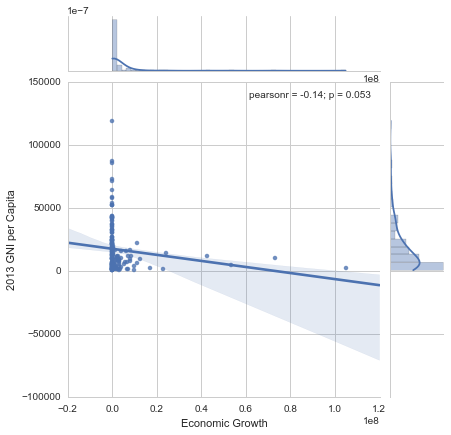

In [53]:
sns.jointplot(kind='reg',x="Economic Growth", y="2013 GNI per Capita", data=foreign_aid)

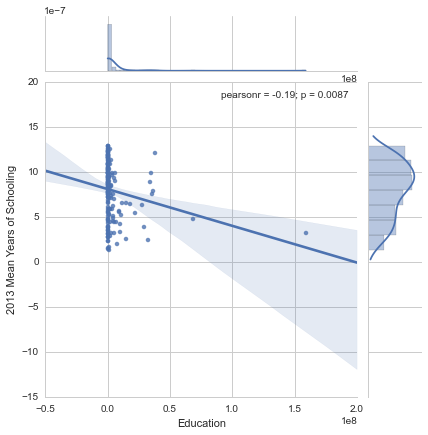

In [54]:
sns.jointplot(kind='reg', x="Education", y="2013 Mean Years of Schooling", data=foreign_aid)

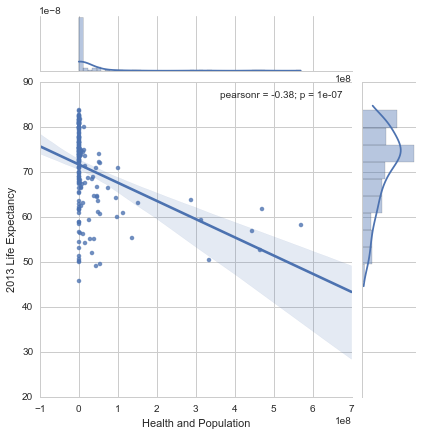

In [55]:
sns.jointplot(kind='reg',x="Health and Population", y="2013 Life Expectancy", data=foreign_aid)